In [14]:
import random
from matplotlib import pyplot as plt

In [11]:
class BlackJack:
    def __init__(self):
        self.player_win = 0
        self.player_draw = 0
        self.player_states = []
        self.player_state_values = {}
        self.showCard = 0
        
    def dealCards(self):
        return random.choice(list(range(1,11))+[10, 10, 10])
    
    def cal_val(self, value, usable_ace, is_player):
        drawn_card = self.dealCards()
        value += drawn_card
        if drawn_card == 1:
            usable_ace += 1
            
        if is_player and (value <= 21 and value >= 12):
            self.player_states.append((value, self.showCard, usable_ace))
    
        return value, usable_ace
 
    def policy(self, value, usable_ace, hit_value, is_player):
        
        while value < hit_value:
            value, usable_ace = self.cal_val(value, usable_ace, is_player)
        
        while value > 21 and usable_ace > 0:
            value -= 10
            usable_ace -= 1
            while value < hit_value:
                value, usable_ace = self.cal_val(value, usable_ace, is_player)

        return value
    
    def giveReward(self, player_value, dealer_value):
        last_state = self.player_states[-1]
        if player_value > 21:
            if dealer_value > 21:
                self.player_draw += 1
            self.player_state_values[last_state] -= 1
            
        if player_value > dealer_value:
            self.player_state_values[last_state] += 1
            self.player_win += 1
        elif player_value == dealer_value:
            self.player_state_values[last_state] -= 1
            self.player_draw += 1
        else:
            self.player_state_values[last_state] -= 1   
        
    def play(self, steps):
        player_hit_value = 20
        dealer_hit_value = 17
        
        for i in range(steps):
        
            player_value = 0
            dealer_value= 0
            player_usable_ace = 0
            dealer_usable_ace = 0

            for i in range(2):
                player_value, player_usable_ace = self.cal_val(player_value, player_usable_ace, is_player = True)

            dealer_value, dealer_usable_ace = self.cal_val(dealer_value, dealer_usable_ace, is_player = False)
            self.showCard = dealer_value

            player_value = self.policy(player_value, player_usable_ace, player_hit_value, is_player = True)
            dealer_value = self.policy(dealer_value, dealer_usable_ace, dealer_hit_value, is_player = False)

            for state in self.player_states:
                self.player_state_values[state] = 0 if self.player_state_values.get(state) is None else self.player_state_values.get(state)

            self.giveReward(player_value, dealer_value)
        

In [39]:
class BlackJack_Only_One_Ace:
    def __init__(self):
        self.player_win = 0
        self.player_draw = 0
        self.player_states = []
        self.player_state_values = {}
        self.showCard = 0
        
    def dealCards(self):
        return random.choice(list(range(1,11))+[10, 10, 10])
    
    def cal_val(self, value, usable_ace, is_player, first_turn = False):
        drawn_card = self.dealCards()
        value += drawn_card
        if drawn_card == 1:
            usable_ace = True
            if first_turn:
                value += 10
            
        if is_player and (value <= 21 and value >= 12):
            self.player_states.append((value, self.showCard, usable_ace))
    
        return value, usable_ace
 
    def policy(self, value, usable_ace, hit_value, is_player):
        
        while value < hit_value:
            value, usable_ace = self.cal_val(value, usable_ace, is_player)
            print(value, usable_ace)
        
        while value > 21 and usable_ace:
            value -= 10
            usable_ace = False
            print(value, usable_ace)
            while value < hit_value:
                value, usable_ace = self.cal_val(value, usable_ace, is_player)
                print(value, usable_ace)

        return value
    
    def giveReward(self, player_value, dealer_value):
        last_state = self.player_states[-1]
        if player_value > 21:
            if dealer_value > 21:
                self.player_draw += 1
            self.player_state_values[last_state] += -1
        elif dealer_value > 21:
            self.player_state_values[last_state] += 1
            self.player_win += 1
        elif player_value > dealer_value:
            self.player_state_values[last_state] += 1
            self.player_win += 1
        elif player_value == dealer_value:
            self.player_state_values[last_state] += -1
            self.player_draw += 1
        else:
            self.player_state_values[last_state] += -1   
            
        print(last_state)
        print(self.player_state_values[last_state])
        
    def play(self, steps):
        player_hit_value = 20
        dealer_hit_value = 17
        
        for i in range(steps):
        
            player_value = 0
            dealer_value= 0
            player_usable_ace = False
            dealer_usable_ace = False

            
            dealer_value, dealer_usable_ace = self.cal_val(dealer_value, dealer_usable_ace, is_player = False)
            print(dealer_value, dealer_usable_ace)
            self.showCard = dealer_value
            print(self.showCard)

            for i in range(2):
                player_value, player_usable_ace = self.cal_val(player_value, player_usable_ace, is_player = True, first_turn = True)
                print(player_value, player_usable_ace)
            
            if player_usable_ace:
                    player_value += 10

            player_value = self.policy(player_value, player_usable_ace, player_hit_value, is_player = True)
            print(player_value)
            dealer_value = self.policy(dealer_value, dealer_usable_ace, dealer_hit_value, is_player = False)
            print(dealer_value)

            for state in self.player_states:
                self.player_state_values[state] = 0 if self.player_state_values.get(state) is None else self.player_state_values.get(state)

            self.giveReward(player_value, dealer_value)
        

In [40]:
game = BlackJack_Only_One_Ace()
game.play(1)

7 False
7
10 False
16 False
19 False
23 False
23
11 False
20 False
20
(19, 7, False)
-1


Text(0.5,0,'reward')

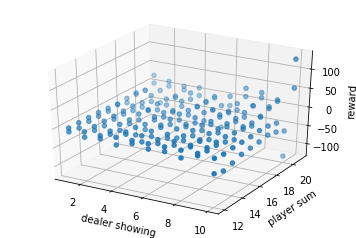

In [22]:
# fig = plt.figure(figsize=[10, 6])
# ax = fig.add_subplot(111, projection = '3d')

from mpl_toolkits.mplot3d import Axes3D
Axes3D = Axes3D  # pycharm auto import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [k[1] for k in game.player_state_values.keys()]
y = [k[0] for k in game.player_state_values.keys()]
z = [v for v in game.player_state_values.values()]
ax.scatter(x, y, z)

ax.set_xlabel("dealer showing")
ax.set_ylabel("player sum")
ax.set_zlabel("reward")